<a href="https://colab.research.google.com/github/moonlight025/HW5_patternrecognize/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 4ms/step - loss: 0.6186 - accuracy: 0.8125 - val_loss: 0.2794 - val_accuracy: 0.9212
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2531 - accuracy: 0.9219 - val_loss: 0.2475 - val_accuracy: 0.9213
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1638 - accuracy: 0.9482 - val_loss: 0.1615 - val_accuracy: 0.9507
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1162 - accuracy: 0.9637 - val_loss: 0.1289 - val_accuracy: 0.9612
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0855 - accuracy: 0.9733 - val_loss: 0.1374 - val_accuracy: 0.9614
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0628 - accuracy: 0.9794 - val_loss: 0.1193 - val_accuracy: 0.9647
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0464 - accuracy: 0.9852 - val_loss: 0.1502 - val_accuracy: 0.9616
Epoch 

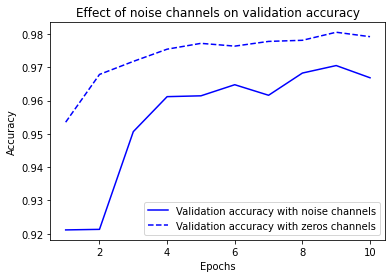

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3181 - accuracy: 0.1030 - val_loss: 2.3060 - val_accuracy: 0.1056
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.3004 - accuracy: 0.1149 - val_loss: 2.3103 - val_accuracy: 0.1043
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2900 - accuracy: 0.1322 - val_loss: 2.3208 - val_accuracy: 0.1065
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2773 - accuracy: 0.1422 - val_loss: 2.3243 - val_accuracy: 0.1071
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2586 - accuracy: 0.1540 - val_loss: 2.3365 - val_accuracy: 0.1055
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2379 - accuracy: 0.1677 - val_loss: 2.3485 - val_accuracy: 0.1065
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2146 - accuracy: 0.1813 - val_loss: 2.3584 - val_accuracy: 0.1071

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 878.4081 - accuracy: 0.3818 - val_loss: 2.9069 - val_accuracy: 0.2878
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 4.8270 - accuracy: 0.2375 - val_loss: 2.3944 - val_accuracy: 0.2804
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 3.2403 - accuracy: 0.2411 - val_loss: 2.1375 - val_accuracy: 0.2355
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8731 - accuracy: 0.2528 - val_loss: 4.7571 - val_accuracy: 0.3052
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7141 - accuracy: 0.2663 - val_loss: 2.5731 - val_accuracy: 0.2228
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4688 - accuracy: 0.2418 - val_loss: 2.6076 - val_accuracy: 0.2490
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8484 - accuracy: 0.2568 - val_loss: 2.2096 - val_accuracy: 0.2104
Epoc

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3980 - accuracy: 0.9107 - val_loss: 0.1516 - val_accuracy: 0.9579
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1402 - accuracy: 0.9638 - val_loss: 0.1842 - val_accuracy: 0.9577
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1213 - accuracy: 0.9722 - val_loss: 0.1587 - val_accuracy: 0.9688
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0943 - accuracy: 0.9788 - val_loss: 0.1974 - val_accuracy: 0.9641
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0876 - accuracy: 0.9818 - val_loss: 0.2005 - val_accuracy: 0.9709
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0795 - accuracy: 0.9845 - val_loss: 0.2413 - val_accuracy: 0.9690
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0707 - accuracy: 0.9866 - val_loss: 0.2119 - val_accuracy: 0.9732
Epoch 

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6661 - accuracy: 0.8366 - val_loss: 0.3597 - val_accuracy: 0.9038
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3516 - accuracy: 0.9040 - val_loss: 0.3088 - val_accuracy: 0.9152
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3153 - accuracy: 0.9131 - val_loss: 0.2904 - val_accuracy: 0.9192
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2996 - accuracy: 0.9166 - val_loss: 0.2819 - val_accuracy: 0.9209
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2895 - accuracy: 0.9192 - val_loss: 0.2752 - val_accuracy: 0.9234
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2833 - accuracy: 0.9210 - val_loss: 0.2723 - val_accuracy: 0.9249
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2783 - accuracy: 0.9222 - val_loss: 0.2687 - val_accuracy: 0.9269
Epoch 

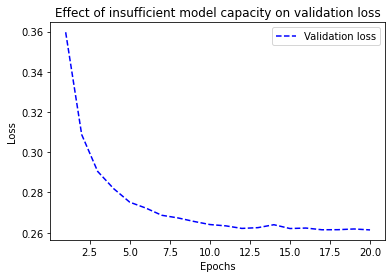

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3502 - accuracy: 0.9001 - val_loss: 0.1749 - val_accuracy: 0.9507
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1553 - accuracy: 0.9538 - val_loss: 0.1398 - val_accuracy: 0.9586
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1108 - accuracy: 0.9670 - val_loss: 0.1136 - val_accuracy: 0.9657
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0857 - accuracy: 0.9736 - val_loss: 0.1065 - val_accuracy: 0.9701
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0683 - accuracy: 0.9784 - val_loss: 0.1089 - val_accuracy: 0.9693
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0558 - accuracy: 0.9826 - val_loss: 0.1064 - val_accuracy: 0.9690
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0946 - val_accuracy: 0.9736
Epoch 

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5190 - accuracy: 0.7855 - val_loss: 0.3817 - val_accuracy: 0.8736
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3071 - accuracy: 0.9032 - val_loss: 0.3088 - val_accuracy: 0.8866
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2235 - accuracy: 0.9289 - val_loss: 0.2991 - val_accuracy: 0.8793
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1768 - accuracy: 0.9420 - val_loss: 0.2897 - val_accuracy: 0.8827
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1424 - accuracy: 0.9545 - val_loss: 0.3023 - val_accuracy: 0.8791
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1160 - accuracy: 0.9645 - val_loss: 0.2964 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0962 - accurac

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.6569 - accuracy: 0.6548 - val_loss: 0.6195 - val_accuracy: 0.6475
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5799 - accuracy: 0.7813 - val_loss: 0.5512 - val_accuracy: 0.8145
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5081 - accuracy: 0.8448 - val_loss: 0.4882 - val_accuracy: 0.8235
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4320 - accuracy: 0.8844 - val_loss: 0.4215 - val_accuracy: 0.8759
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3594 - accuracy: 0.9141 - val_loss: 0.3698 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2997 - accuracy: 0.9290 - val_loss: 0.3328 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2518 - accuracy: 0.9385 - val_loss: 0.3052 - val_accuracy: 0.8916
Epoch 8/20
30

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5423 - accuracy: 0.7584 - val_loss: 0.3004 - val_accuracy: 0.8847
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2495 - accuracy: 0.9025 - val_loss: 0.3216 - val_accuracy: 0.8719
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1509 - accuracy: 0.9431 - val_loss: 0.3126 - val_accuracy: 0.8914
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0938 - accuracy: 0.9699 - val_loss: 0.3633 - val_accuracy: 0.8914
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1140 - accuracy: 0.9793 - val_loss: 0.3451 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0052 - accuracy: 0.9997 - val_loss: 0.4969 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 7.4600e-04 - accuracy: 0.9999 - val_loss: 0.5913 - val_accuracy: 0.8890
Epoch 8/2

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5833 - accuracy: 0.7867 - val_loss: 0.4689 - val_accuracy: 0.8544
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3936 - accuracy: 0.8951 - val_loss: 0.3890 - val_accuracy: 0.8861
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3314 - accuracy: 0.9161 - val_loss: 0.3869 - val_accuracy: 0.8754
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3014 - accuracy: 0.9263 - val_loss: 0.3622 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2885 - accuracy: 0.9262 - val_loss: 0.3601 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2694 - accuracy: 0.9378 - val_loss: 0.3647 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2609 - accuracy: 0.9392 - val_loss: 0.3878 - val_accuracy: 0.8754
Epoch 8/20
30

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6251 - accuracy: 0.6499 - val_loss: 0.5165 - val_accuracy: 0.8354
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5029 - accuracy: 0.7769 - val_loss: 0.4153 - val_accuracy: 0.8695
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4281 - accuracy: 0.8301 - val_loss: 0.3534 - val_accuracy: 0.8799
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3732 - accuracy: 0.8634 - val_loss: 0.3147 - val_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3191 - accuracy: 0.8883 - val_loss: 0.3120 - val_accuracy: 0.8809
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2876 - accuracy: 0.9024 - val_loss: 0.2967 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2503 - accuracy: 0.9210 - val_loss: 0.2970 - val_accuracy: 0.8893
Epoch 8/20
30